In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from tools.getData import getData

pairs = {"silver_6":"SI=F",
            "bac_3":"BAC", 
             "citi_3":"C", 
             "euro_3":"EURUSD=X", 
             "gold_6":"GC=F", 
             "wheat_6":"ZW=F", 
             "sp6m_6":"^GSPC"}

In [42]:

rnd, yf_price = getData("sp6m_6")

yf_price['return'] = np.log(yf_price['Close']/yf_price['Close'].shift(1)) # daily return 
yf_price['return'] = yf_price['return'].shift(-1)
    
R2 = pd.DataFrame()
Pvalue = pd.DataFrame()
time_interval = [i for i in range(10, 190, 5)]
for win in time_interval:
    r2_series = pd.Series(dtype=float)
    qval_series =  pd.Series(dtype=float)
        
    indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=win) # win size forward return
    yf_price['forward_ret'] = yf_price['return'].rolling(window=indexer).sum()
    rnd['forward_ret'] = yf_price['forward_ret']
        
    selected = ['mu', 'sd', 'skew','kurt','p10','p50','p90','prDec','prInc','forward_ret']
    full_df = rnd[selected].copy().dropna()
    y = full_df['forward_ret']
    full_df = full_df.drop('forward_ret', axis= 1)
        
    for fname in full_df.columns:
            
        X = full_df[fname]
        X = sm.add_constant(X)
            
        model = sm.OLS(y, X).fit()
            
        r_squared = model.rsquared
        r2_series[fname] = round(r_squared,4)
            
        p_values = model.pvalues[fname]
        qval_series[fname] = round(p_values,4)
        
    R2[f'{win}'] = r2_series
    Pvalue[f'{win}'] = qval_series
        
R2 = R2.T
Pvalue = Pvalue.T

In [43]:
R2

,mu,sd,skew,kurt,p10,p50,p90,prDec,prInc
10,0.0001,0.0016,0.0000,0.0000,0.0008,0.0002,0.0017,0.0011,0.0019
15,0.0011,0.0045,0.0003,0.0004,0.0038,0.0008,0.0039,0.0033,0.0052
20,0.0019,0.0064,0.0000,0.0001,0.0056,0.0028,0.0045,0.0048,0.0061
25,0.0043,0.0143,0.0001,0.0008,0.0134,0.0042,0.0108,0.0122,0.0134
30,0.0062,0.0165,0.0003,0.0000,0.0155,0.0050,0.0112,0.0144,0.0133
35,0.0061,0.0153,0.0005,0.0000,0.0144,0.0048,0.0099,0.0135,0.0120
40,0.0099,0.0182,0.0015,0.0001,0.0178,0.0047,0.0107,0.0161,0.0132
45,0.0113,0.0215,0.0016,0.0000,0.0214,0.0068,0.0126,0.0189,0.0158
50,0.0111,0.0205,0.0020,0.0001,0.0201,0.0064,0.0118,0.0179,0.0152
55,0.0111,0.0232,0.0012,0.0000,0.0229,0.0085,0.0139,0.0201,0.0184


In [44]:
Pvalue

,mu,sd,skew,kurt,p10,p50,p90,prDec,prInc
10,0.7787,0.2996,0.9083,0.9225,0.4527,0.7000,0.2877,0.3759,0.2508
15,0.3901,0.0814,0.6358,0.6169,0.1085,0.4673,0.1015,0.1349,0.0586
20,0.2610,0.0370,0.9681,0.8101,0.0505,0.1703,0.0806,0.0706,0.0419
25,0.0876,0.0018,0.7869,0.4692,0.0025,0.0898,0.0066,0.0039,0.0025
30,0.0399,0.0008,0.6407,0.8708,0.0011,0.0646,0.0057,0.0017,0.0026
35,0.0416,0.0012,0.5658,0.9473,0.0017,0.0700,0.0094,0.0025,0.0043
40,0.0094,0.0004,0.3164,0.8398,0.0005,0.0731,0.0071,0.0009,0.0028
45,0.0056,0.0001,0.3046,0.9545,0.0001,0.0324,0.0034,0.0003,0.0010
50,0.0062,0.0002,0.2414,0.7945,0.0002,0.0379,0.0048,0.0005,0.0014
55,0.0062,0.0001,0.3778,0.9294,0.0001,0.0168,0.0021,0.0002,0.0004


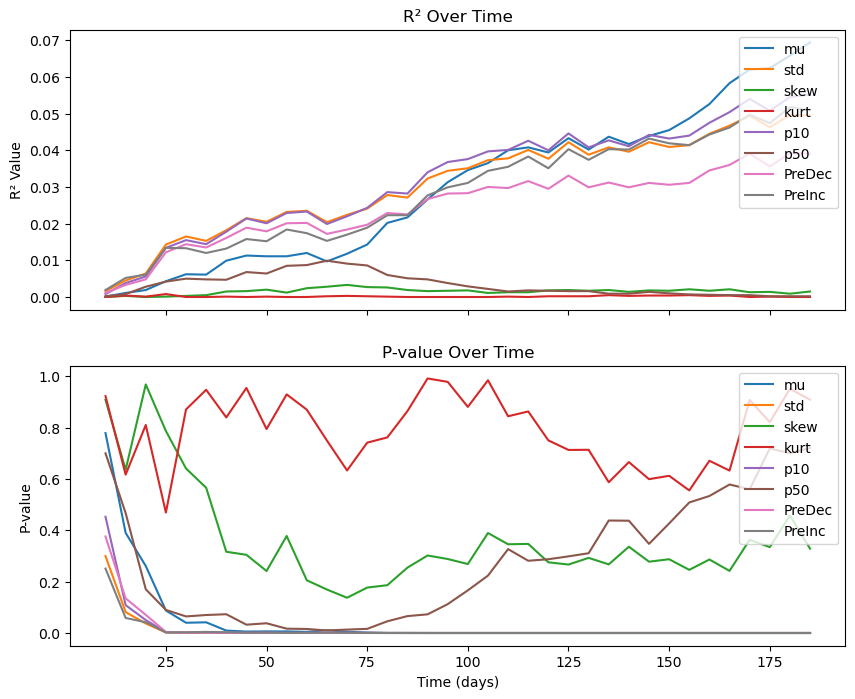

In [45]:

time_interval = pd.Series([i for i in range(10, 190, 5)])

# Creating a figure with two subplots, one above the other
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plotting R² series on the first subplot
axs[0].plot(time_interval, R2["mu"], label='mu')
axs[0].plot(time_interval, R2["sd"], label='std')
axs[0].plot(time_interval, R2["skew"], label='skew')
axs[0].plot(time_interval, R2["kurt"], label='kurt')
axs[0].plot(time_interval, R2["p10"], label='p10')
axs[0].plot(time_interval, R2["p50"], label='p50')
axs[0].plot(time_interval, R2["prDec"], label='PreDec')
axs[0].plot(time_interval, R2["prInc"], label='PreInc')
axs[0].set_ylabel('R² Value')
axs[0].legend(loc='upper right')
axs[0].set_title('R² Over Time')

# Plotting P-value series on the second subplot
axs[1].plot(time_interval, Pvalue["mu"], label='mu')
axs[1].plot(time_interval, Pvalue["sd"], label='std')
axs[1].plot(time_interval, Pvalue["skew"], label='skew')
axs[1].plot(time_interval, Pvalue["kurt"], label='kurt')
axs[1].plot(time_interval, Pvalue["p10"], label='p10')
axs[1].plot(time_interval, Pvalue["p50"], label='p50')
axs[1].plot(time_interval, Pvalue["prDec"], label='PreDec')
axs[1].plot(time_interval, Pvalue["prInc"], label='PreInc')
axs[1].set_xlabel('Time (days)')
axs[1].set_ylabel('P-value')
axs[1].legend(loc='upper right')
axs[1].set_title('P-value Over Time')

# Adjust layout for better spacing
# plt.tight_layout()

plt.show()

In [46]:
pairs = {"silver_6":"SI=F",
            "bac_3":"BAC", 
             "citi_3":"C", 
             "corn_6":"ZC=F", 
             "euro_3":"EURUSD=X", 
             "gold_6":"GC=F", 
            #  "iyr_3":"IYR", 
             "oil_6":"CL=F", 
             "pound_3":"GBPUSD=X", 
             "soybns_6":"ZS=F", 
            #  "tr5yr_3":"^FVX", 
            #  "tr10yr_6":"^TNX", 
             "wheat_6":"ZW=F", 
             "yen_3":"JPY=X",
             "sp6m_6":"^GSPC",
             "sp12m_12":"^GSPC"}


rnd, yf_price = getData("sp6m_6")

yf_price['return'] = np.log(yf_price['Close']/yf_price['Close'].shift(1)) # daily return 
yf_price['return'] = yf_price['return'].shift(-1)

R2 = pd.DataFrame()
Pvalue = pd.DataFrame()
time_interval = [i for i in range(10, 190, 5)]
for win in time_interval:
    r2_series = pd.Series(dtype=float)
    qval_series =  pd.Series(dtype=float)
        
    indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=win) # win size forward volatility
    yf_price['forward_rv'] = np.sqrt((yf_price['return']**2).rolling(window=indexer).sum())
    rnd['forward_vol'] = yf_price['forward_rv']
        
    selected = ['mu', 'sd', 'skew','kurt','p10','p50','p90','prDec','prInc','forward_vol']
    full_df = rnd[selected].copy().dropna()
    y = full_df['forward_vol']
    full_df = full_df.drop('forward_vol', axis= 1)
        
    for fname in full_df.columns:
            
        X = full_df[fname]
        X = sm.add_constant(X)
            
        model = sm.OLS(y, X).fit()
            
        r_squared = model.rsquared
        r2_series[fname] = round(r_squared,4)
            
        p_values = model.pvalues[fname]
        qval_series[fname] = round(p_values,4)
        
    R2[f'{win}dayR2'] = r2_series
    Pvalue[f'{win}dayPvalues'] = qval_series
        
R2 = R2.T
Pvalue = Pvalue.T

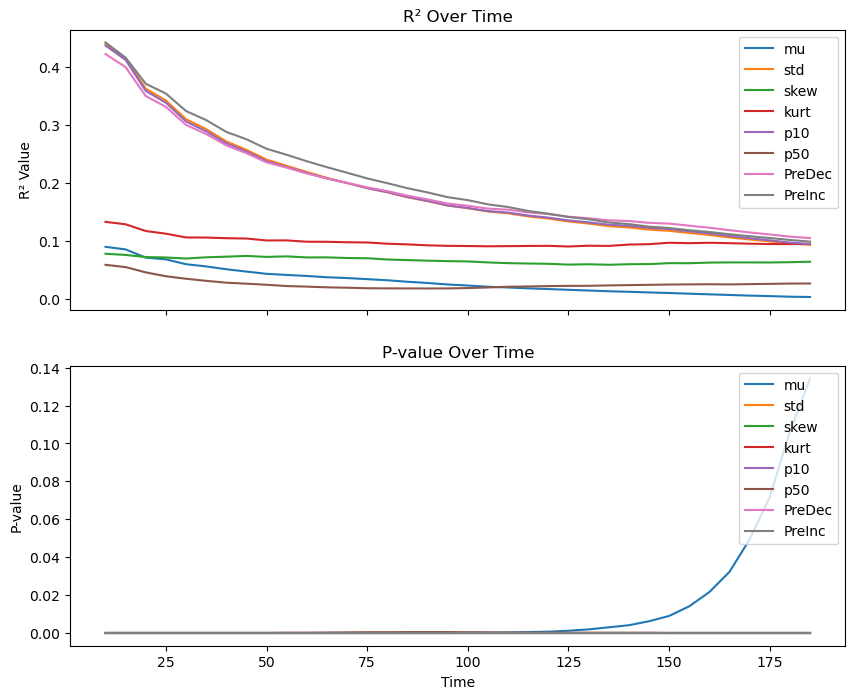

In [47]:
time_interval = pd.Series([i for i in range(10, 190, 5)])

# Creating a figure with two subplots, one above the other
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plotting R² series on the first subplot
axs[0].plot(time_interval, R2["mu"], label='mu')
axs[0].plot(time_interval, R2["sd"], label='std')
axs[0].plot(time_interval, R2["skew"], label='skew')
axs[0].plot(time_interval, R2["kurt"], label='kurt')
axs[0].plot(time_interval, R2["p10"], label='p10')
axs[0].plot(time_interval, R2["p50"], label='p50')
axs[0].plot(time_interval, R2["prDec"], label='PreDec')
axs[0].plot(time_interval, R2["prInc"], label='PreInc')
axs[0].set_ylabel('R² Value')
axs[0].legend(loc='upper right')
axs[0].set_title('R² Over Time')

# Plotting P-value series on the second subplot
axs[1].plot(time_interval, Pvalue["mu"], label='mu')
axs[1].plot(time_interval, Pvalue["sd"], label='std')
axs[1].plot(time_interval, Pvalue["skew"], label='skew')
axs[1].plot(time_interval, Pvalue["kurt"], label='kurt')
axs[1].plot(time_interval, Pvalue["p10"], label='p10')
axs[1].plot(time_interval, Pvalue["p50"], label='p50')
axs[1].plot(time_interval, Pvalue["prDec"], label='PreDec')
axs[1].plot(time_interval, Pvalue["prInc"], label='PreInc')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('P-value')
axs[1].legend(loc='upper right')
axs[1].set_title('P-value Over Time')

# Adjust layout for better spacing
# plt.tight_layout()

plt.show()